In [47]:
#importing pandas
import pandas as pd
#read in the housing data
df = pd.read_csv('house_selling_prices.csv')
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [48]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm

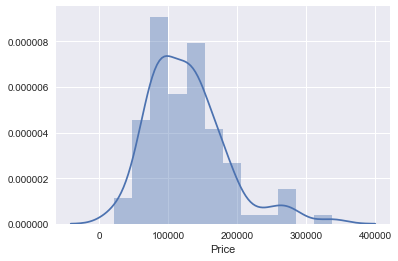

In [49]:
#Plot the distribution for Price
sns.distplot(df["Price"])

In [50]:
#Calculate the Kolmogorov–Smirnov statistic to test for normality
df_price = df["Price"]
stats.kstest(df_price, 'norm', norm.fit(df["Price"]))

KstestResult(statistic=0.092013927930138628, pvalue=0.34610331296867636)

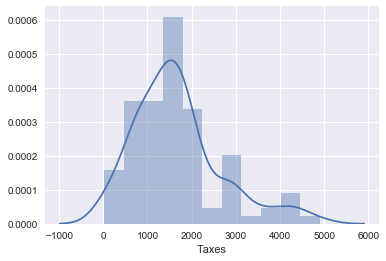

In [51]:
#Plot the distribtion for Taxes
sns.distplot(df["Taxes"])

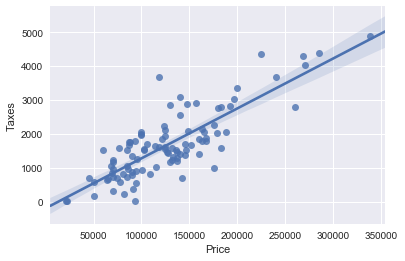

In [52]:
#Plot the Regression for Taxes vs Prices
sns.regplot(x=df["Price"], y=df["Taxes"])

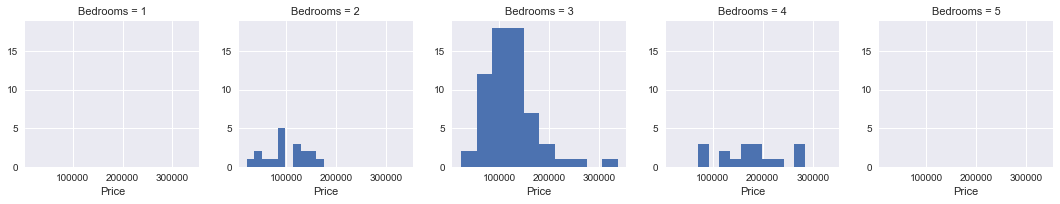

In [53]:
import matplotlib.pyplot as plt

#Plot small multiples for Price with Number of Bedrooms 
multiples = sns.FacetGrid(df, col = "Bedrooms")
multiples = multiples.map(plt.hist, "Price")

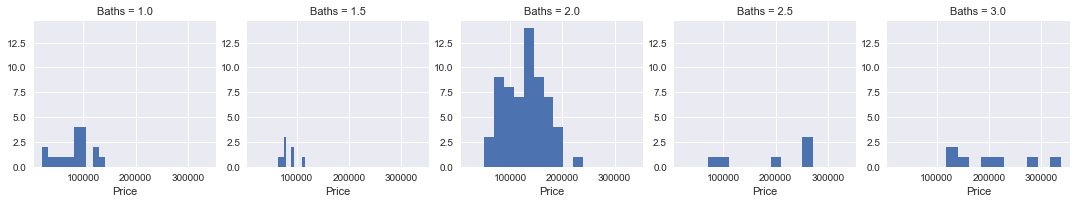

In [54]:
import matplotlib.pyplot as plt

#Plot the small multiples for Price vs Number of Baths
multiples = sns.FacetGrid(df, col = "Baths")
multiples = multiples.map(plt.hist, "Price")

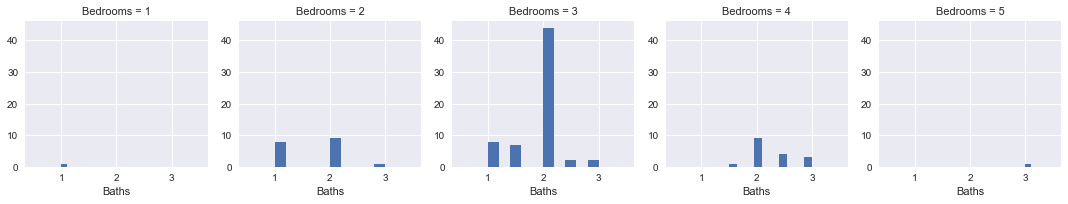

In [55]:
import matplotlib.pyplot as plt

#Plot the small multiples for Baths vs Bedrooms
multiples = sns.FacetGrid(df, col = "Bedrooms")
multiples = multiples.map(plt.hist, "Baths")

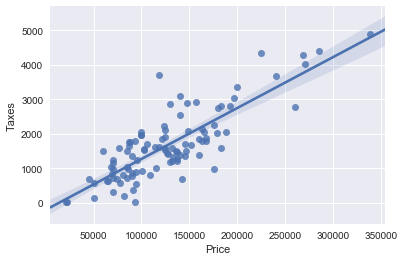

In [56]:
sns.regplot(x='Price', y='Taxes', data=df)

In [57]:
df["Price"].describe()

count       100.000000
mean     126698.000000
std       56356.774718
min       21000.000000
25%       86875.000000
50%      123750.000000
75%      153075.000000
max      338000.000000
Name: Price, dtype: float64

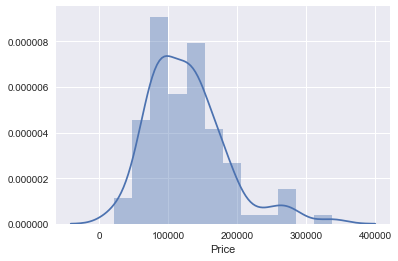

In [58]:
sns.distplot(df["Price"])

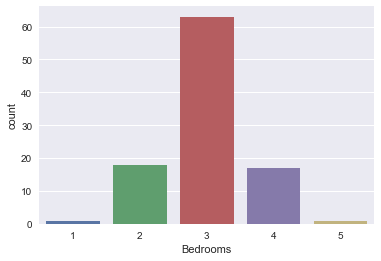

In [59]:
bedroom_count = df["Bedrooms"].value_counts()
sns.countplot(df["Bedrooms"])

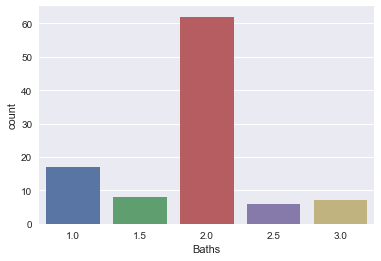

In [60]:
sns.countplot(df["Baths"])

In [61]:
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [62]:
import statsmodels.api as sm

X = df["Price"]
Y = df["Taxes"]

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Taxes   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1036.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           3.07e-54
Time:                        15:18:13   Log-Likelihood:                -777.35
No. Observations:                 100   AIC:                             1557.
Df Residuals:                      99   BIC:                             1559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price          0.0134      0.000     32.184      0.0

In [63]:
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [64]:
import statsmodels.api as sm

Y = df["Price"]
X = df[["Bedrooms", "Taxes", "Baths", "Size", "Lot"]]

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     475.7
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.39e-65
Time:                        15:18:15   Log-Likelihood:                -1162.8
No. Observations:                 100   AIC:                             2336.
Df Residuals:                      95   BIC:                             2349.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bedrooms   -5084.7061   4141.321     -1.228      0.2

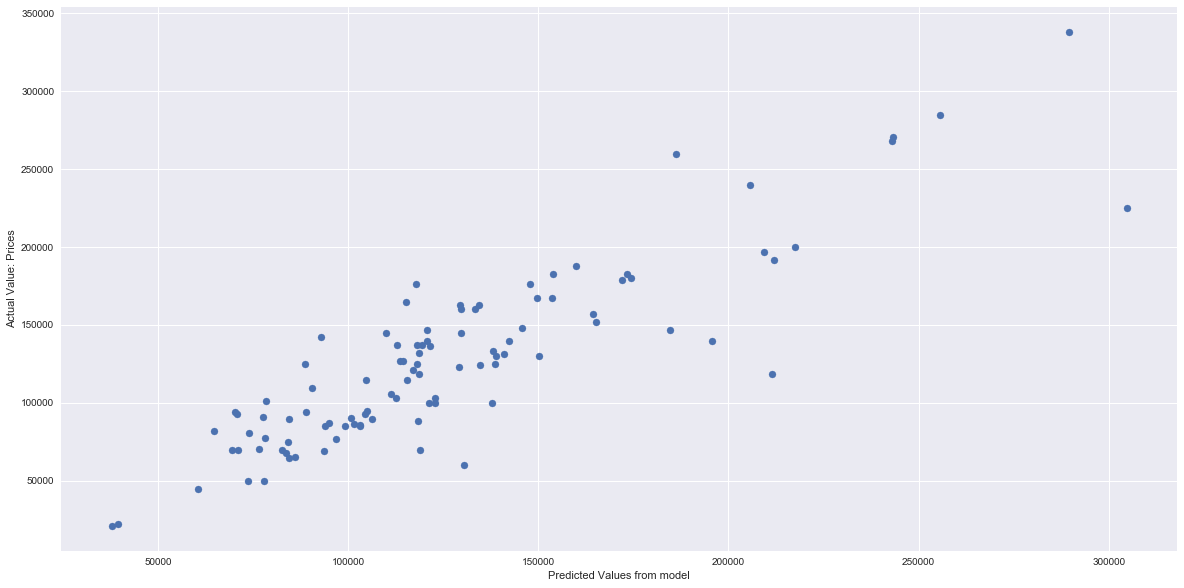

In [65]:
predictions = model.predict(X)
plt.figure(figsize = (20,10))
plt.scatter(predictions, Y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: Prices")
plt.show()

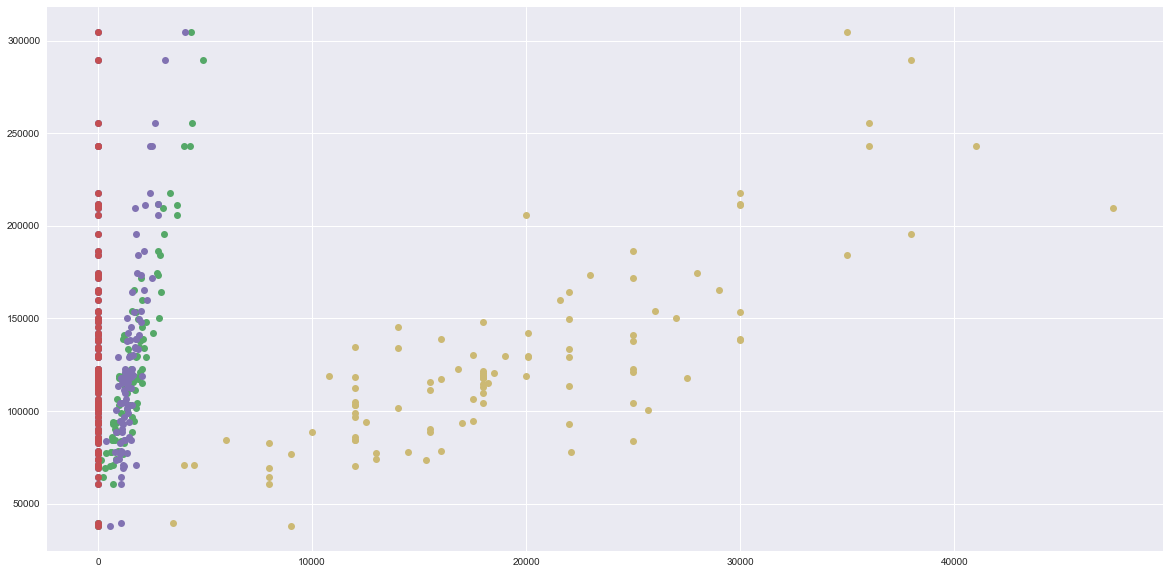

In [66]:
plt.figure(figsize=(20,10))
plt.plot(X, model.fittedvalues, 'o')
plt.show()

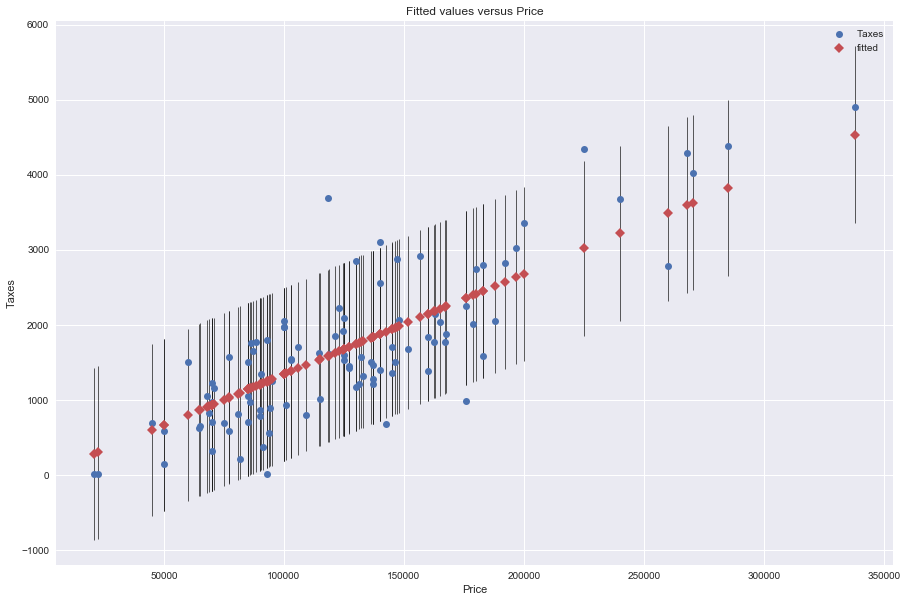

In [67]:
X = df["Price"]
Y = df["Taxes"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)

In [68]:
predictions.head()

0    109828.635348
1     83752.639139
2    104598.734843
3     93609.961317
4    134327.245291
dtype: float64

In [69]:
df["Price"].head()

0    145000
1     68000
2    115000
3     69000
4    163000
Name: Price, dtype: int64

In [70]:
import statsmodels.api as sm

Y = df["Price"]
X = df[["Bedrooms", "Taxes", "Baths", "Size", "Lot"]]

multi_model = sm.OLS(Y,X).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     475.7
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.39e-65
Time:                        15:18:20   Log-Likelihood:                -1162.8
No. Observations:                 100   AIC:                             2336.
Df Residuals:                      95   BIC:                             2349.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bedrooms   -5084.7061   4141.321     -1.228      0.2

In [71]:
print("Making predictions for the following 5 houses:")
print(X.head())

Making predictions for the following 5 houses:
   Bedrooms  Taxes  Baths  Size    Lot
0         3   1360    2.0  1240  18000
1         1   1050    1.0   370  25000
2         3   1010    1.5  1130  25000
3         3    830    2.0  1120  17000
4         3   2150    2.0  1710  14000


In [72]:
print("The predictions are")
print(multi_model.predict(X.head()))

The predictions are
0    109828.635348
1     83752.639139
2    104598.734843
3     93609.961317
4    134327.245291
dtype: float64


In [73]:
df["Price"][:5]

0    145000
1     68000
2    115000
3     69000
4    163000
Name: Price, dtype: int64

In [74]:
predictors = pd.Series([3, 1800, 2, 1300, 20000])
pred_df = pd.DataFrame([predictors.values], columns = X.columns.values.tolist(), dtype='float')
pred_df

,Bedrooms,Taxes,Baths,Size,Lot
0,3.0,1800.0,2.0,1300.0,20000.0


In [75]:
print("Predicted price is: ")
print(multi_model.predict(pred_df))

Predicted price is: 
0    123969.012749
dtype: float64


In [76]:
import sklearn.cross_validation

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80, 5)
(80,)
(20, 5)
(20,)


In [77]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_train)
Y_pred[:5]

array([ 184896.14049438,   71691.26316648,   95543.66744196,
        127042.36337295,  201112.10606984])

In [78]:
#From trained data: 80% split
print(sklearn.metrics.mean_squared_error(Y_train, lm.predict(X_train)))

801739354.811


In [79]:
#From test data: 20% split
print(sklearn.metrics.mean_squared_error(Y_test, lm.predict(X_test)))

568401316.364


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

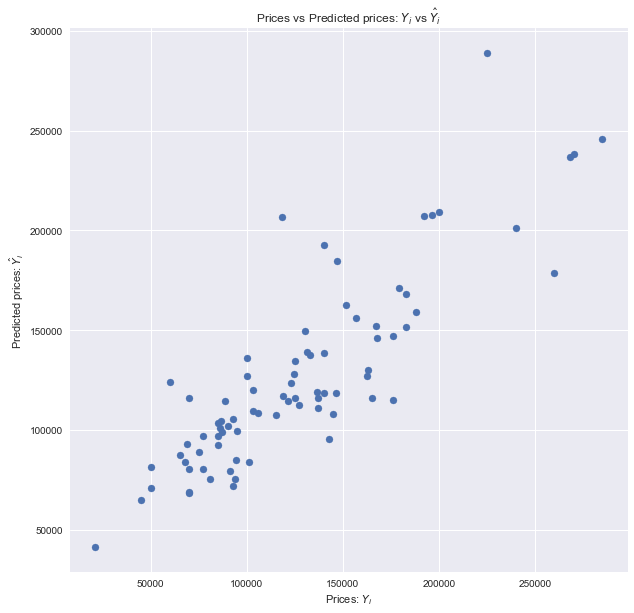

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [81]:
print(lm.predict(X_test))

[  77641.67229075  170605.64066152  109276.39950613  132016.8581198
  134660.66227478  126907.51028142   83326.32543806  103476.53787894
   44639.09013177  141759.57728294  116272.68461226   88318.95763939
  117423.67448423  125592.04696406   63972.2038902   274856.26679214
  127197.69118584   89686.46725386  112906.55138967   78642.77927507]
